## Prep: Population dynamics

### Q' inich Figueroa Coc: Gruppe 5
### Paris J. Huth: Gruppe 1

In [189]:
import numpy as np 
import matplotlib.pyplot as plt 
# check for stability -> derivative > 0 instable ie <0 stable

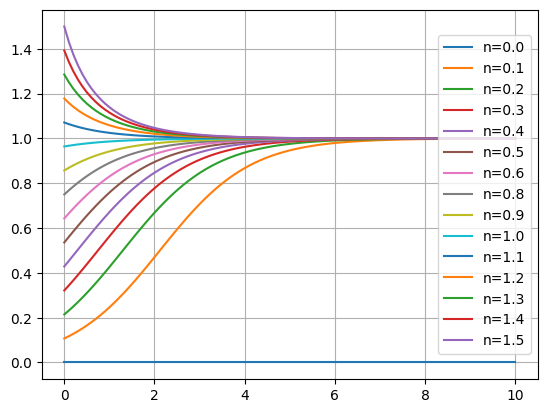

In [2]:
# import scipy.integrate as odeint
def logistic_equation(n,tau):
    return n*(1-n)

def solve_logistic_equation(n0,tau_values):
    n_sol = ((n0/(1-n0)) * np.exp(tau_values)) / (1+(n0/(1-n0))*np.exp(tau_values))
    return n_sol.flatten()

n0= np.linspace(0.0,1.5,15)
tau_values = np.linspace(0,10,100)


for n in n0:
    n_solution = solve_logistic_equation(n,tau_values)
    plt.plot(tau_values, n_solution,label=f'n={n:.1f}')

plt.grid(True)
plt.legend(loc='right')
plt.show()

## Population dynamics

We are considering the following population dynamic:
$$\frac{\mathrm{d}N}{\mathrm{d}t} = rN\left( 1 - \frac{N}{K}\right) - \frac{BN^2}{A^2+N^2}$$
Introducing normalizations the following term can be obtained:
$$n\alpha \left(1-n\beta\right) - \frac{n^2}{1+n^2} $$ 
If we consider for which values of $n$ this equation is equal to $0$, we get the fixed points. In our case this includes the trivial $n_0 = 0$, while the rest can be calculated via:

$$
n\left[\alpha\left(1-n\beta\right)-\frac{n}{1+n^2} \right]=0\\
1-n\left(\frac{1}{\alpha}+\beta \right) +n^2-n^3\beta=0
$$

In [151]:
def N(n,alph):
    return 1-n*(1/alph+1/8)+n**2 - n**3 * 1/8

In [152]:
def fpRoots(alph):
    coef = np.array([-1/8, 1, -(1/alph+1/8), 1])
    roots = np.roots(coef)
    return(roots)


In [182]:
alph = np.linspace(0.2,0.8,1000)
r = []
for i in range(0, len(alph)):
    r.append(fpRoots(alph[i])) 
r = np.array(r)
print('The roots for the first five values of α:')
print(r[:5])

The roots for the first five values of α:
[[3.89852235+4.92128763j 3.89852235-4.92128763j 0.20295529+0.j        ]
 [3.89820044+4.90886264j 3.89820044-4.90886264j 0.20359913+0.j        ]
 [3.89787833+4.89647906j 3.89787833-4.89647906j 0.20424335+0.j        ]
 [3.89755603+4.88413653j 3.89755603-4.88413653j 0.20488795+0.j        ]
 [3.89723353+4.87183473j 3.89723353-4.87183473j 0.20553293+0.j        ]]


The array r contains the roots of approx. 1000 values of $\alpha$ between 0.2 and 0.8 in form of sub-arrays. Most of these were ommited for the sake of a cleaner output and redunancy.

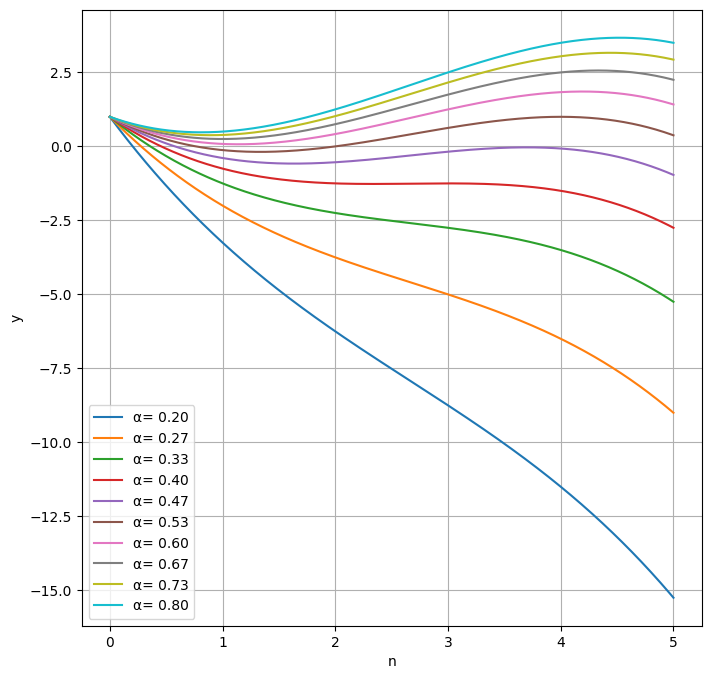

In [184]:
n = np.linspace(0,5,1000)
alpha = np.linspace(0.2,0.8,10)
f, ax = plt.subplots(1,1, figsize=(8,8))
for i in range(0,10):
    ax.plot(n,N(n,alpha[i]) ,label='α= %.2f' % alpha[i])

ax.grid()
ax.set(xlabel="n",ylabel="y")
ax.legend()

By using the previously calculated array of r, the number of real roots in each sub-array can be identified and used to create a mask, the limits of which correspond to the switch between 1 and 3 roots.

In [201]:
# index array for real roots
mask = np.isreal(r)

# number of real roots in each sub-array
count = np.sum(mask, axis=1)

mask1 = (count == 1)
mask3 = (count == 3)

i1 = (alph[np.where(mask1)])
i3 = (alph[np.where(mask3)])

print(
    'The Number of real fixed points is 3 in the approximate intervall between:'
)
print([min(i3), max(i3)])
len(alph)

The Number of real fixed points is 3 in the approximate intervall between:
[0.46906906906906914, 0.5783783783783785]


1000

Check for stability of the FP's via derivative < 0.
Calculate the roots, then check the value of the derivative at said point.

In [231]:
alph = np.linspace(0.2,0.8,20)
r = []
for i in range(0, len(alph)):
    r.append(fpRoots(alph[i])) 
r = np.array(r)

def dN(n, alph):
    return alph - 2*n*alph*1/8 - 2*n/((1+n**2)**2)

res = []
for i in range(0,len(r)):
    res.append(dN(r[i],alph[i]))
res = np.array(res)

mask = (res<0)
stabR = r[mask]
stab = np.where(mask, 'stable', 'instable')
stab


[0.20295529+0.j 0.23736866+0.j 0.27313523+0.j 0.31062741+0.j
 0.3503195 +0.j 0.39283956+0.j 0.43905738+0.j 0.49024467+0.j
 0.54839649+0.j 4.5043164 +0.j 0.61696745+0.j 5.03811861+0.j
 0.70293619+0.j 5.36916241+0.j 0.82517774+0.j 5.61452582+0.j
 5.80932269+0.j 5.97002812+0.j 6.10598886+0.j 6.22311628+0.j
 6.32542353+0.j 6.41577475+0.j 6.49629161+0.j]


array([['instable', 'instable', 'stable'],
       ['instable', 'instable', 'stable'],
       ['instable', 'instable', 'stable'],
       ['instable', 'instable', 'stable'],
       ['instable', 'instable', 'stable'],
       ['instable', 'instable', 'stable'],
       ['instable', 'instable', 'stable'],
       ['instable', 'instable', 'stable'],
       ['instable', 'instable', 'stable'],
       ['stable', 'instable', 'stable'],
       ['stable', 'instable', 'stable'],
       ['stable', 'instable', 'stable'],
       ['stable', 'instable', 'instable'],
       ['stable', 'instable', 'instable'],
       ['stable', 'instable', 'instable'],
       ['stable', 'instable', 'instable'],
       ['stable', 'instable', 'instable'],
       ['stable', 'instable', 'instable'],
       ['stable', 'instable', 'instable'],
       ['stable', 'instable', 'instable']], dtype='<U8')

After calculating the roots r for the 20 values of alpha, the same points where considered in its derivative, after which a mask was created with all values < 0 ie stable points. A vector of strings indecating this was created in the form of stab. The values for the stable r value are collected in the stabR variable. 